# Chapter 3

## Perceptron

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

rng = np.random.RandomState(123)

d = 2
N = 10
mean = 5

x1 = rng.randn(N,d) + np.array([0,0])
x2= rng.randn(N,d) + np.array([mean,mean])

In [3]:
x = np.concatenate((x1,x2), axis=0)

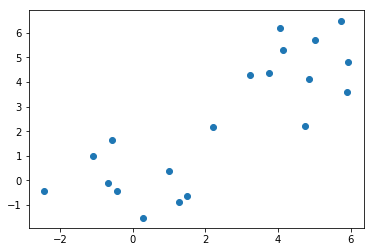

In [4]:
plt.scatter(x[:,0], x[:,1])

In [5]:
w = np.zeros(d)
b = 0

In [6]:
def y(x):
    return step(np.dot(w,x) + b)

def step(x):
    return 1 * (x > 0)

In [7]:
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [8]:
while True:
    classified = True
    for i in range(N*2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
    if classified:
        break

In [9]:
print(w,b)

[ 2.14037745  1.2763927 ] -9


w[0] x1 + w[1] x2 - 9 = 0

In [10]:
def classifier(x):
    y = - (w[0]*x - 9) / w[1]
    return y

In [11]:
x2 = np.linspace(-3,6,10)

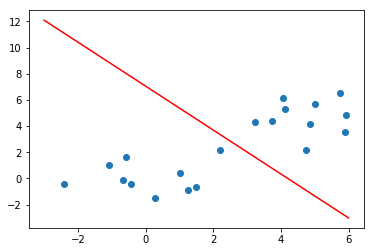

In [12]:
plt.scatter(x[:,0], x[:,1])
plt.plot(x2, classifier(x2), "r-")

## Logistic Regression